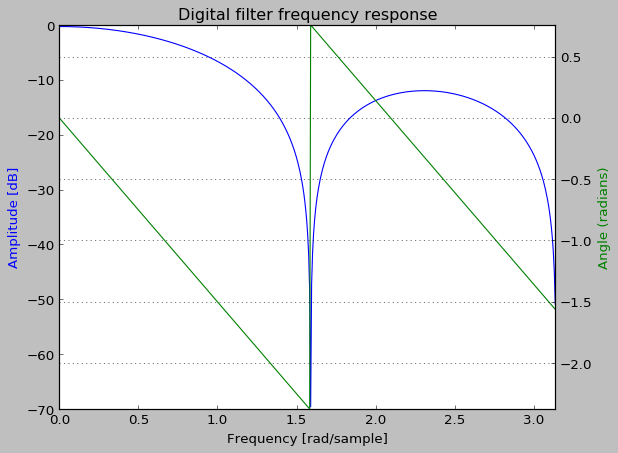

In [1]:
""" setup """

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from pyha.common.util import plot_freqz
from scipy import signal
from pyhacores.filter.fir.model import FIR

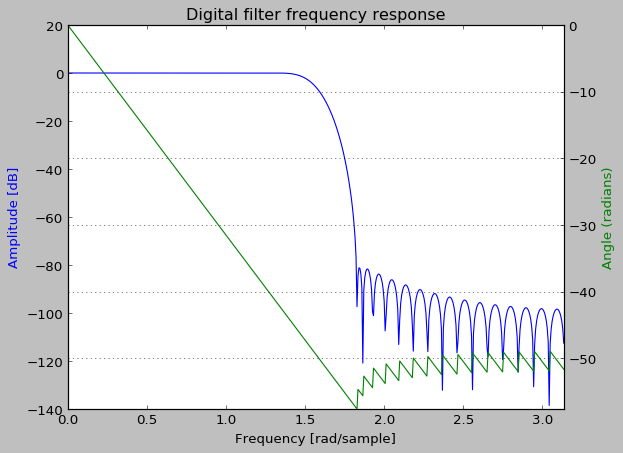

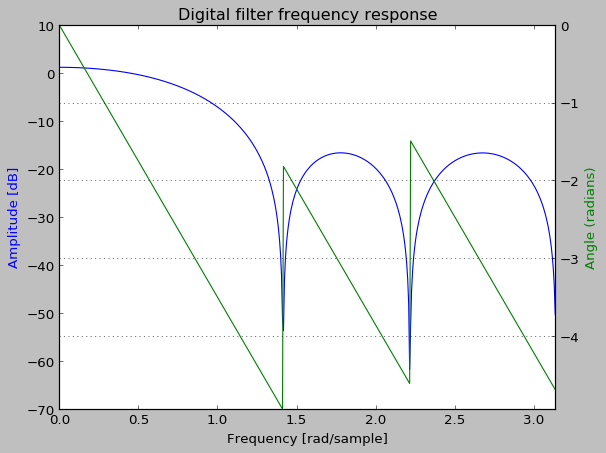

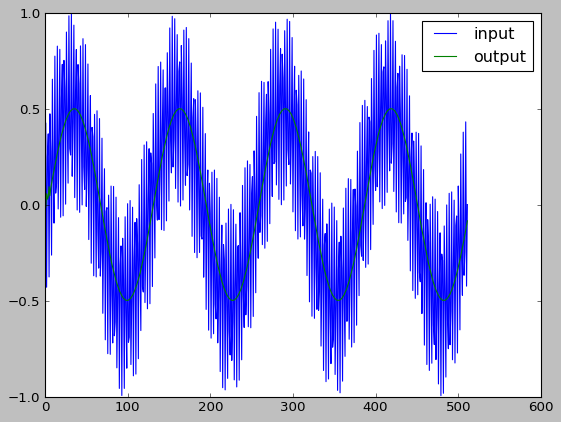

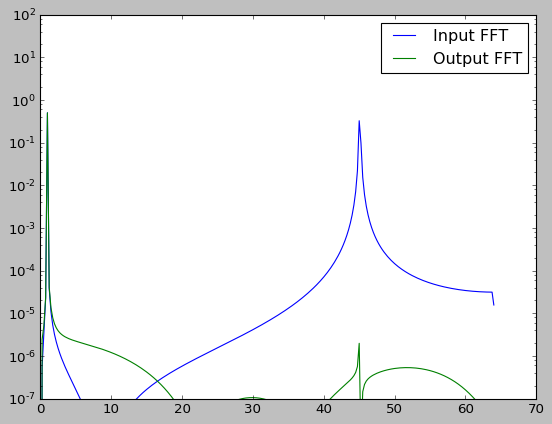

In [21]:
""" low-pass filter """

# design filter
b = signal.firwin(64, 0.5, window=('kaiser', 8))
plot_freqz(b)

# input signal, sum of two sines
fs = 128
s0 = np.sin(2 * np.pi * 1 * np.linspace(0, 4, 4*fs)) * 0.5
s1 = np.sin(2 * np.pi * 45 * np.linspace(0, 4, 4*fs)) * 0.5
input = s0 + s1

# output
model = FIR(b)
output = model.model_main(input)

plt.plot(input, label='input')
plt.plot(output, label='output')
plt.legend()
plt.show()


plt.semilogy(*signal.periodogram(input, fs), label='Input FFT')
plt.semilogy(*signal.periodogram(output, fs), label='Output FFT')
plt.ylim([1e-7, 1e2])
plt.legend()
plt.show()

assert_sim_match(model, output, input)